In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


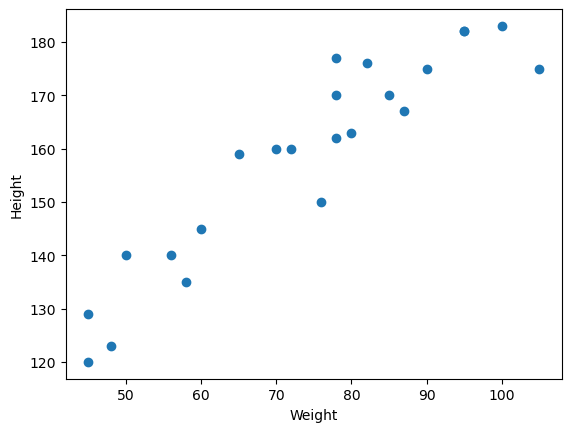

In [5]:
# Scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [6]:
## Finding correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


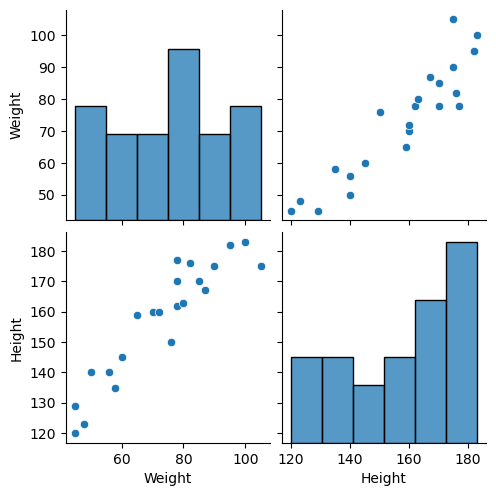

In [8]:
## seaborn for visualoization
sns.pairplot(df)

In [9]:
# Dependent and Independent feature
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [24]:
x = df[['Weight']]  ## Independent feature should be dataframe  or 2 dimenstional array
x.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [25]:
y = df['Height']   ## This variable can be in series or 1d array
y.head()

0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

In [26]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=34)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(17, 1) (6, 1) (17,) (6,)


In [27]:
## Standarization
from sklearn.preprocessing import StandardScaler

In [28]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)

In [29]:
x_test = ss.transform(x_test)

In [30]:
x_test

array([[ 0.20775554],
       [ 1.03185249],
       [-0.02770074],
       [ 1.91481352],
       [-1.61703058],
       [ 0.32548367]])

In [32]:
# Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [37]:
print("Coefficient or Slope :",lr.coef_)

Coefficient or Slope : [17.95354084]


In [39]:
print("Intercept :",lr.intercept_)

Intercept : 158.0


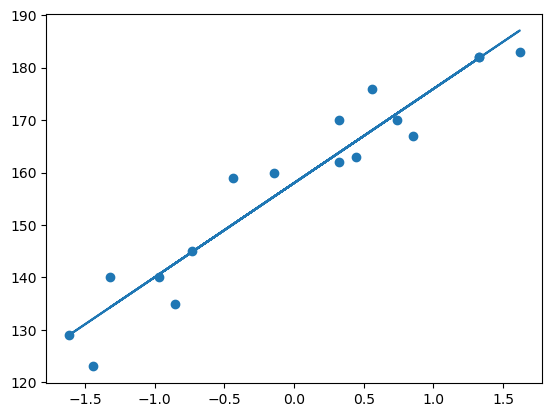

In [41]:
## Plot traning data plot best fit line
plt.scatter(x_train,y_train)
plt.plot(x_train,lr.predict(x_train))

## Prediction of data
1. predict height output = intercept + coef_*weight()
2. y_pred_test = 158 + 17.95(x_test)

In [42]:
## Prediction of test data
y_pred = lr.predict(x_test)

In [45]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [46]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [47]:
print(mse)
print(mae)
print(rmse)

116.94427346834084
9.209225555315768
10.81407755975242


## R square
- formula
## R^2 = SSR/SST
## R^2 = coefficent of determination, SSR = Sum of Square residuals, SST = Total Sum of Square

In [48]:
from sklearn.metrics import r2_score

In [49]:
r2_score(y_test,y_pred)

0.7121371730010071

In [ ]:
## OLS Linear regression

In [55]:
import statsmodels.regression.linear_model as sm


In [56]:
model  = sm.OLS(y_train,x_train).fit()

In [57]:
pred  = model.predict(x_test)
print(pred)

[  3.72994749  18.52540585  -0.49732633  34.37768266 -29.0314246
   5.84358439]


In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.013
Model:                            OLS   Adj. R-squared (uncentered):             -0.049
Method:                 Least Squares   F-statistic:                             0.2064
Date:                Sat, 08 Nov 2025   Prob (F-statistic):                       0.656
Time:                        14:47:32   Log-Likelihood:                         -110.20
No. Observations:                  17   AIC:                                      222.4
Df Residuals:                      16   BIC:                                      223.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.9535     39.521      0.454      0.656     -65.827     101.734
==============================================================================
Omnibus:                        0.370   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.831   Jarque-Bera (JB):                0.495
Skew:                           0.062   Prob(JB):                        0.781
Kurtosis:                       2.173   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
## prediction of New data
lr.predict(ss.transform([[72]]))

C:\Users\juned\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([157.50267367])